# Cleaning and Analyzing Star Wars Survey Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data set has some characters that aren't in Python's default utf-8. So we need to specify the encoding below:

In [33]:
star_wars = pd.read_csv('./data/star_wars.csv', encoding="ISO-8859-1") 

In [34]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Remove rows where RespondentID is NaN

In [35]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

## Map values in second and third columns from ('Yes', 'No' strings and NaN values) to (boolean values and NaN values)

In [36]:
yes_no = {
    'Yes': True,
    'No' : False
}

star_wars[star_wars.columns[1]] =  star_wars[star_wars.columns[1]].map(yes_no)
star_wars[star_wars.columns[2]] =  star_wars[star_wars.columns[2]].map(yes_no)

## Map values in 4th to 8th column from (name of the corresponding film as a string and NaN values) to Boolean values 

In [37]:
for column in star_wars.columns[3:9] :
    film = star_wars[column].value_counts().index[0]
    star_wars[column] = star_wars[column].map({film:True,np.NAN:False})

## Rename 4th to 8th columns names

In [40]:
columns_map = {}
i = 0
for c in star_wars.columns[3:9] :
    i += 1
    columns_map[c] = f'seen_{i}'
columns_map

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [41]:
star_wars = star_wars.rename(columns = columns_map)

## Cleaning the ranking columns

In [43]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [44]:
ranking_columns_map = {}
j = 0
for c in star_wars.columns[9:15] :
    j += 1
    ranking_columns_map[c] = f'ranking_{j}'
ranking_columns_map

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [45]:
star_wars = star_wars.rename(columns = ranking_columns_map)

## Finding the highest-ranked movie

In [47]:
# Let's calculate the mean value of each ranking
ranking_means = []
for c in star_wars.columns[9:15] :
    ranking_means.append(star_wars[c].mean())
ranking_means_tuple = tuple(ranking_means)

[Text(0, 0, 'r1'),
 Text(0, 0, 'r2'),
 Text(0, 0, 'r3'),
 Text(0, 0, 'r4'),
 Text(0, 0, 'r5'),
 Text(0, 0, 'r6')]

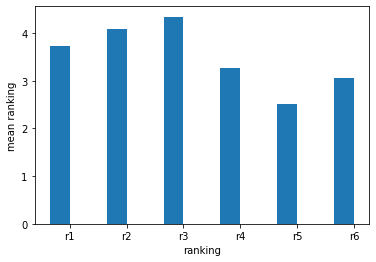

In [48]:
%matplotlib inline

ind = np.arange(6)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind, ranking_means_tuple, width)

ax.set_ylabel('mean ranking')
ax.set_xlabel('ranking')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('r1', 'r2', 'r3', 'r4', 'r5','r6'))

So far, I cleaned the ranking columns, calculated the mean value for each and created a bar plot for each ranking.
We can see that ranking 5 has the best (lowest) mean value.
So Star Wars: Episode V The Empire Strikes Back has the best average ranking.

## Finding the most viewed movie

In [49]:
seen_sum ={}
for c in star_wars.columns[3:9] :
    seen_sum[c] = star_wars[c].sum()

[Text(0, 0, 'seen_1'),
 Text(0, 0, 'seen_2'),
 Text(0, 0, 'seen_3'),
 Text(0, 0, 'seen_4'),
 Text(0, 0, 'seen_5'),
 Text(0, 0, 'seen_6')]

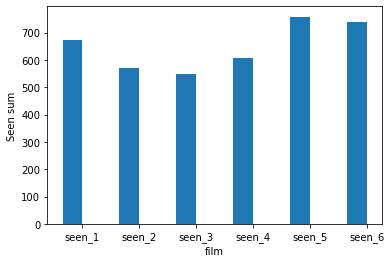

In [51]:
seen_sum_tuple = tuple(seen_sum.values())

%matplotlib inline
fig, ax = plt.subplots()
ax.bar(ind, seen_sum_tuple, width)

ax.set_ylabel('Seen sum')
ax.set_xlabel('film')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(tuple(seen_sum))

The most seen film is the fifth one : "Star Wars: Episode V The Empire Strikes Back"

## Exploring the Data by Binary Segments

Let's split the data into two groups based on the column : "Do you consider yourself to be a fan of the Star Wars film franchise?"

In [53]:
star_wars_fan = star_wars[star_wars[star_wars.columns[2]] == True]
star_wars_fan.name = 'sw_franchise_fans'
not_star_wars_fan = star_wars[star_wars[star_wars.columns[2]] ==False]
not_star_wars_fan.name = 'sw_franchise_non_fans'

# Finding the highest ranked movie by people who consider themselves to be fan of the star wars franchise 

Let's create functions that do the same analyisis on a given group of our data frame 
The analysis includes :
- finding the most seen film and visualizing the sum of seen values for each film --> this will be done by analyze_seen function
- finding the best ranked film and visualizing the mean values of the each film rankings --> this will be done by analyze_ranking function

In [89]:
def analyze_ranking(df) :
    
    ranking_mean_per_film = {}
    for c in df.columns[9:15] :
        ranking_mean_per_film[c] = df[c].mean()
    
    print('Mean rankings by',df.name,'for each film are :','\n',ranking_mean_per_film)
    print('\n')
    
    ranking_mean_per_film_tuple = tuple(ranking_mean_per_film.values())
    
    fig, ax = plt.subplots()
    ind = np.arange(6)  
    width = 0.35       
    ax.bar(ind, ranking_mean_per_film_tuple, width)
    ax.set_ylabel('mean ranking')
    ax.set_xlabel('ranking')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(tuple(ranking_mean_per_film))
    ax.set_title('Films ranking means for '+ df.name)

In [90]:
def analyze_seen(df) :
    
    seen_sum_per_film = {}  
    for c in df.columns[3:9] :
        seen_sum_per_film[c] = df[c].sum()
        
    print('Seen sums by',df.name,'for each film are :','\n',seen_sum_per_film)
    print('\n')
        
    seen_sum_per_film_tuple = tuple(seen_sum_per_film.values())
    
    fig, ax = plt.subplots()
    ind = np.arange(6)  
    width = 0.35       
    ax.bar(ind, seen_sum_per_film_tuple, width)
    ax.set_ylabel('seen sum')
    ax.set_xlabel('film')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(tuple(seen_sum_per_film))
    ax.set_title('Films seen sums for '+ df.name)

Let's analyze mean rankings for the first group (star wars franchise fans)

Mean rankings by sw_franchise_fans for each film are : 
 {'ranking_1': 4.141304347826087, 'ranking_2': 4.342391304347826, 'ranking_3': 4.417422867513611, 'ranking_4': 2.9329710144927534, 'ranking_5': 2.3333333333333335, 'ranking_6': 2.829710144927536}




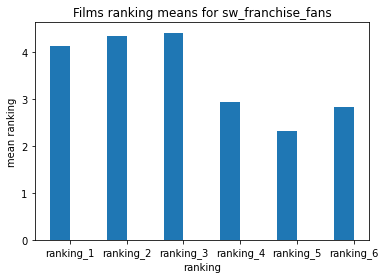

In [91]:
analyze_ranking(star_wars_fan)

Let's analyze seen sums for the first group (star wars franchise fans)

Seen sums by sw_franchise_fans for each film are : 
 {'seen_1': 500, 'seen_2': 463, 'seen_3': 450, 'seen_4': 483, 'seen_5': 538, 'seen_6': 537}




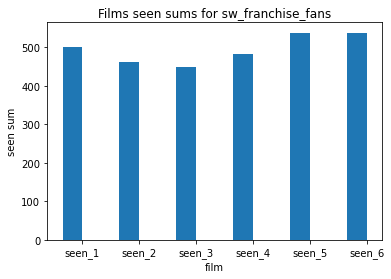

In [92]:
analyze_seen(star_wars_fan)

Let's analyze mean rankings for the second group (star wars franchise non fans)

Mean rankings by sw_franchise_non_fans for each film are : 
 {'ranking_1': 2.9363957597173145, 'ranking_2': 3.591549295774648, 'ranking_3': 4.193661971830986, 'ranking_4': 3.933098591549296, 'ranking_5': 2.862676056338028, 'ranking_6': 3.471830985915493}




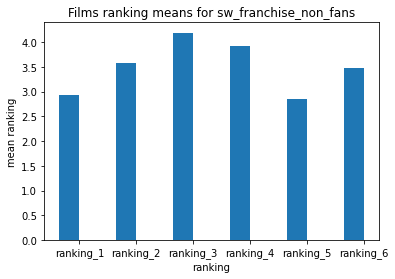

In [93]:
analyze_ranking(not_star_wars_fan)

Let's analyze mean rankings for the second group (star wars franchise non fans)

Seen sums by sw_franchise_non_fans for each film are : 
 {'seen_1': 173, 'seen_2': 108, 'seen_3': 100, 'seen_4': 124, 'seen_5': 220, 'seen_6': 201}




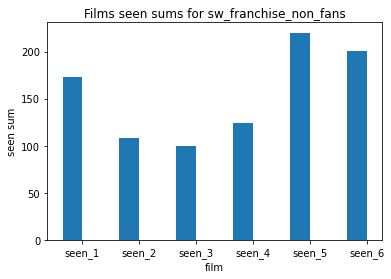

In [94]:
analyze_seen(not_star_wars_fan)

In the four bar plots above we can see that :
- SW franchise fans ranked the fifth film the best and saw it the most
- SW franchise non fans ranked also the fifth film the best and saw it the most

So the fifth film "Star Wars: Episode V The Empire Strikes Back" was the best ranked and most seen by both star wars franchise fans and non fans. We can say that it is the most successful one.

## Segment the data based on education column which is not binary and look for any interesting patterns :

Let's explore values of the column 'Education'

In [95]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [96]:
college = star_wars[star_wars['Education']=='Some college or Associate degree']
college.name = 'college_degree_owners'
bachelor = star_wars[star_wars['Education']=='Bachelor degree']
bachelor.name = 'bachelor_degree_owners'
graduate = star_wars[star_wars['Education']=='Graduate degree']
graduate.name = 'graduate_degree_owners'
high_school = star_wars[star_wars['Education']=='High school degree']
high_school.name = 'high_school_degree_owners'
less = star_wars[star_wars['Education']=='Less than high school degree']
less.name = 'less_than_high_school_degree_owners'

### let's analyze ranking and seen data for each segment :

Mean rankings by college_degree_owners for each film are : 
 {'ranking_1': 3.5511811023622046, 'ranking_2': 3.8858267716535435, 'ranking_3': 4.102362204724409, 'ranking_4': 3.5039370078740157, 'ranking_5': 2.783464566929134, 'ranking_6': 3.173228346456693}


Seen sums by college_degree_owners for each film are : 
 {'seen_1': 211, 'seen_2': 186, 'seen_3': 183, 'seen_4': 180, 'seen_5': 227, 'seen_6': 223}




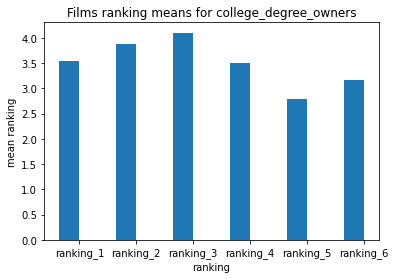

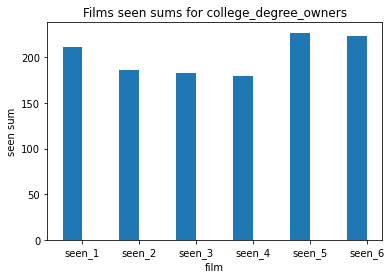

In [97]:
analyze_ranking(college)
analyze_seen(college)

Mean rankings by bachelor_degree_owners for each film are : 
 {'ranking_1': 3.8282442748091605, 'ranking_2': 4.290076335877862, 'ranking_3': 4.521072796934866, 'ranking_4': 3.114503816793893, 'ranking_5': 2.3091603053435112, 'ranking_6': 2.931297709923664}


Seen sums by bachelor_degree_owners for each film are : 
 {'seen_1': 206, 'seen_2': 170, 'seen_3': 163, 'seen_4': 195, 'seen_5': 243, 'seen_6': 234}




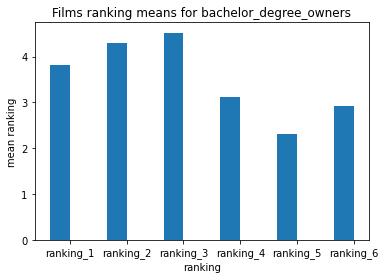

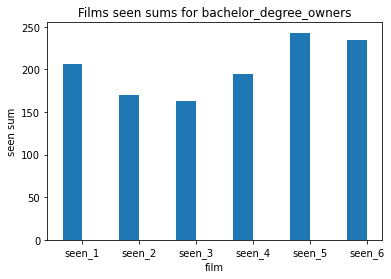

In [98]:
analyze_ranking(bachelor)
analyze_seen(bachelor)

Mean rankings by graduate_degree_owners for each film are : 
 {'ranking_1': 3.8222222222222224, 'ranking_2': 4.225663716814159, 'ranking_3': 4.5, 'ranking_4': 3.1991150442477876, 'ranking_5': 2.3230088495575223, 'ranking_6': 2.920353982300885}


Seen sums by graduate_degree_owners for each film are : 
 {'seen_1': 179, 'seen_2': 149, 'seen_3': 139, 'seen_4': 163, 'seen_5': 207, 'seen_6': 201}




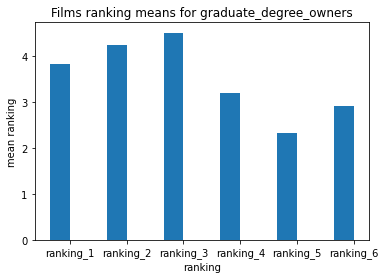

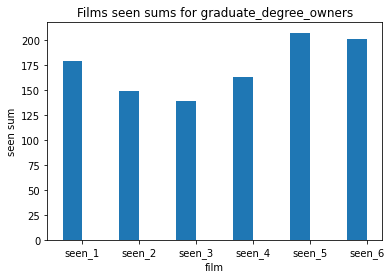

In [99]:
analyze_ranking(graduate)
analyze_seen(graduate)

Mean rankings by high_school_degree_owners for each film are : 
 {'ranking_1': 3.8028169014084505, 'ranking_2': 3.7464788732394365, 'ranking_3': 4.126760563380282, 'ranking_4': 3.211267605633803, 'ranking_5': 2.8732394366197185, 'ranking_6': 3.23943661971831}


Seen sums by high_school_degree_owners for each film are : 
 {'seen_1': 57, 'seen_2': 48, 'seen_3': 48, 'seen_4': 53, 'seen_5': 61, 'seen_6': 60}




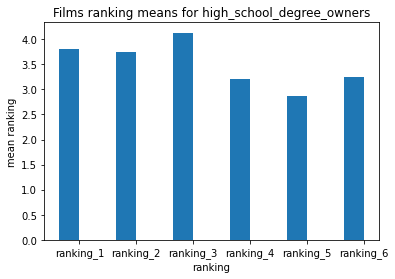

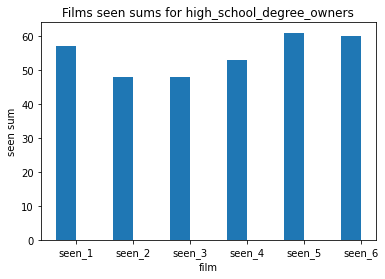

In [100]:
analyze_ranking(high_school)
analyze_seen(high_school)

Mean rankings by less_than_high_school_degree_owners for each film are : 
 {'ranking_1': 5.0, 'ranking_2': 5.333333333333333, 'ranking_3': 3.6666666666666665, 'ranking_4': 2.6666666666666665, 'ranking_5': 1.0, 'ranking_6': 3.3333333333333335}


Seen sums by less_than_high_school_degree_owners for each film are : 
 {'seen_1': 3, 'seen_2': 3, 'seen_3': 3, 'seen_4': 3, 'seen_5': 3, 'seen_6': 3}




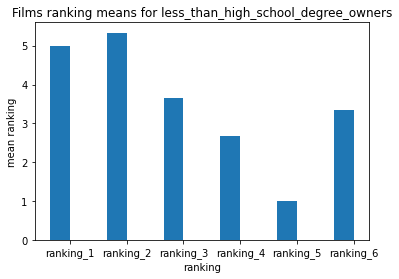

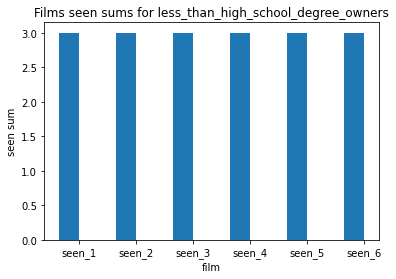

In [101]:
analyze_ranking(less)
analyze_seen(less)

On the bar plots above we can see, that the variation of seen and ranking values decreases with decreasing education level. So we can say that people with lower education levels evaluate all the six films almost equally.

## Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably

let's look at these columns 

In [29]:
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [102]:
star_wars[star_wars.columns[15]].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

In [103]:
star_wars[star_wars.columns[16]].value_counts(dropna=False)

Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int64

It seems like all the columns evaluate the caracters the same way : from very unfavorably to very favorably.
So we can map these data to float values (1 is the best and 6 is the worst evaluation).
This evaluation system is the same as the film ranking system.

In [104]:
evaluation_map = {'Very favorably':1,
                  'Somewhat favorably':2,
                  'Neither favorably nor unfavorably (neutral)':3,
                  'Somewhat unfavorably':4,
                  'Unfamiliar (N/A)':5,
                  'Very unfavorably':6 }

for c in star_wars.columns[15:29] :
    star_wars[c] = star_wars[c].map(evaluation_map)

Mapping the caracters columns names :

In [106]:
star_wars_raw = pd.read_csv('./data/star_wars.csv')
characters_columns_map = {}
i = 15
for c in star_wars.columns[15:29] :
    characters_columns_map[c] = star_wars_raw.iloc[0,i]
    i+=1
characters_columns_map

{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
 'Unnamed: 16': 'Luke Skywalker',
 'Unnamed: 17': 'Princess Leia Organa',
 'Unnamed: 18': 'Anakin Skywalker',
 'Unnamed: 19': 'Obi Wan Kenobi',
 'Unnamed: 20': 'Emperor Palpatine',
 'Unnamed: 21': 'Darth Vader',
 'Unnamed: 22': 'Lando Calrissian',
 'Unnamed: 23': 'Boba Fett',
 'Unnamed: 24': 'C-3P0',
 'Unnamed: 25': 'R2 D2',
 'Unnamed: 26': 'Jar Jar Binks',
 'Unnamed: 27': 'Padme Amidala',
 'Unnamed: 28': 'Yoda'}

In [108]:
star_wars = star_wars.rename(columns=characters_columns_map)
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
5,1.0,2.0,2.0,4.0,1.0,6.0,2.0,3.0,1.0,2.0,2.0,6.0,2.0,2.0


Here we can use a similar method to the analyze_ranking function assigning the mean ranking value to each caracter 

In [110]:
ranking_mean_per_character = {}
for c in star_wars.columns[15:29] :
    ranking_mean_per_character[c] = star_wars[c].mean()
    
print('Mean evaluations per character are :','\n',ranking_mean_per_character)

Mean evaluations per character are : 
 {'Han Solo': 1.3956574185765984, 'Luke Skywalker': 1.4488567990373045, 'Princess Leia Organa': 1.4861612515042117, 'Anakin Skywalker': 2.4471445929526126, 'Obi Wan Kenobi': 1.450909090909091, 'Emperor Palpatine': 3.477886977886978, 'Darth Vader': 2.7312348668280872, 'Lando Calrissian': 2.848780487804878, 'Boba Fett': 3.08128078817734, 'C-3P0': 1.6662636033857317, 'R2 D2': 1.4807228915662651, 'Jar Jar Binks': 3.7040194884287456, 'Padme Amidala': 2.961916461916462, 'Yoda': 1.423728813559322}


Visualizing the mean evaluation for each caracter :

(array([ 0.175,  1.175,  2.175,  3.175,  4.175,  5.175,  6.175,  7.175,
         8.175,  9.175, 10.175, 11.175, 12.175, 13.175]),
 <a list of 14 Text major ticklabel objects>)

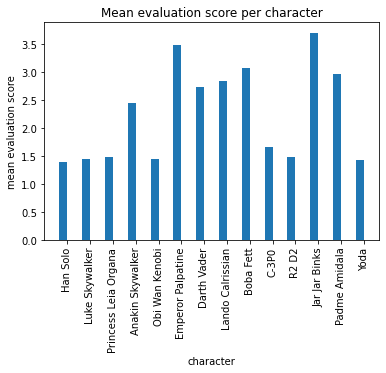

In [113]:
ranking_mean_per_character_tuple = tuple(ranking_mean_per_character.values())
    
fig, ax = plt.subplots()
ind = np.arange(14)  # the x locations for the groups
width = 0.35       # the width of the bars
ax.bar(ind, ranking_mean_per_character_tuple, width)
ax.set_ylabel('mean evaluation score')
ax.set_xlabel('character')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(tuple(ranking_mean_per_character))
ax.set_title('Mean evaluation score per character')
plt.xticks(rotation=90)

We can see that like Han Solo the most and dislike Jar Jar Binks the most.
The most controversial character must have the closest mean evaluation score to the mean of all characters mean evaluation scores. So let's calculate this value :

## Find out the most controversial character

Approach: calculate the total mean ranking for all characters and find out the character with the nearest ranking to the total mean.

In [116]:
_sum = 0
count = 0
for score in ranking_mean_per_character.values() :
    _sum += score
    count +=1
total_mean = _sum/count
total_mean

2.257468823752402

The closest mean evaluation score to the total mean (2.25) is the score of 'Anakin Skywalker' (2.44) so he is the most controversial character.